In [1]:
import pandas as np
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("..")
from Functions.UNSW_DF import *

C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [7]:
df = pd.read_csv("Analysis_LR/LR_results.csv")
df = df.drop(["max_Iter", "Penalty", "runtime(s)", "C"], axis=1)

In [10]:
columns = ["train_acc", "test_acc", "F1", "precision", "recall"]

for col in columns:
    df[col] *= 100


In [13]:
df = pd.melt(df, id_vars="solver", var_name="metric", value_name="score")

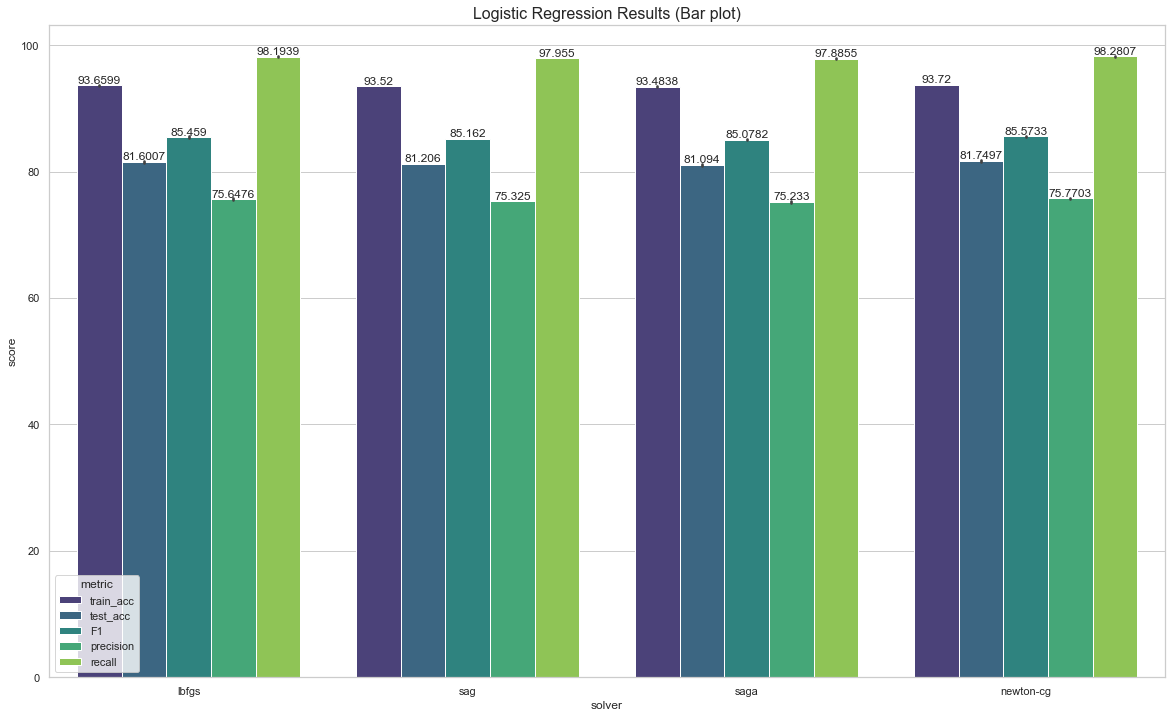

In [17]:
sns.set(rc={"figure.figsize":(20, 12), 'axes.facecolor':'white',})
sns.set_style("whitegrid")
ax = sns.barplot(x='solver', y='score', hue='metric', data=df, palette="viridis")
plt.title("Logistic Regression Results (Bar plot)", size=16)

for container in ax.containers:
    ax.bar_label(container)
ax.figure.savefig("Analysis_LR/LR_Results.png", dpi=400)

## Distplot

In [20]:
df_dist

,criterion,n_estimators,max_depth,min_samples_split,min_samples_leaf,train_acc,test_acc,F1,precision,recall,runtime(s)
0,gini,100,None,2,1,0.99816,0.87130,0.89398,0.81801,0.98551,8.5
1,gini,200,None,2,1,0.99817,0.87222,0.89473,0.81878,0.98621,16.1
2,gini,200,20,2,1,0.98625,0.87034,0.89359,0.81512,0.98879,15.8
3,gini,200,50,2,1,0.99817,0.87213,0.89467,0.81858,0.98637,16.3
4,gini,200,70,20,10,0.97095,0.86806,0.89204,0.81171,0.99003,14.4
5,gini,200,100,4,2,0.99338,0.87060,0.89374,0.81566,0.98835,16.6
6,gini,1000,50,2,1,0.99817,0.87236,0.89491,0.81851,0.98703,76.3
7,gini,1000,None,2,1,0.99817,0.87203,0.89466,0.81816,0.98694,76.7
8,gini,2000,50,20,10,0.97117,0.86848,0.89237,0.81215,0.99016,153.4
9,entropy,100,None,2,1,0.99817,0.87263,0.89491,0.81992,0.98500,10.8


In [21]:
df_dist = pd.read_csv("Analysis_LR/LR_results.csv")
df_dist = df_dist.drop(["max_Iter", "Penalty", "runtime(s)", "C"], axis=1)
columns = ["train_acc", "test_acc", "F1", "precision", "recall"]
for col in columns:
    df_dist[col] *= 100


C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

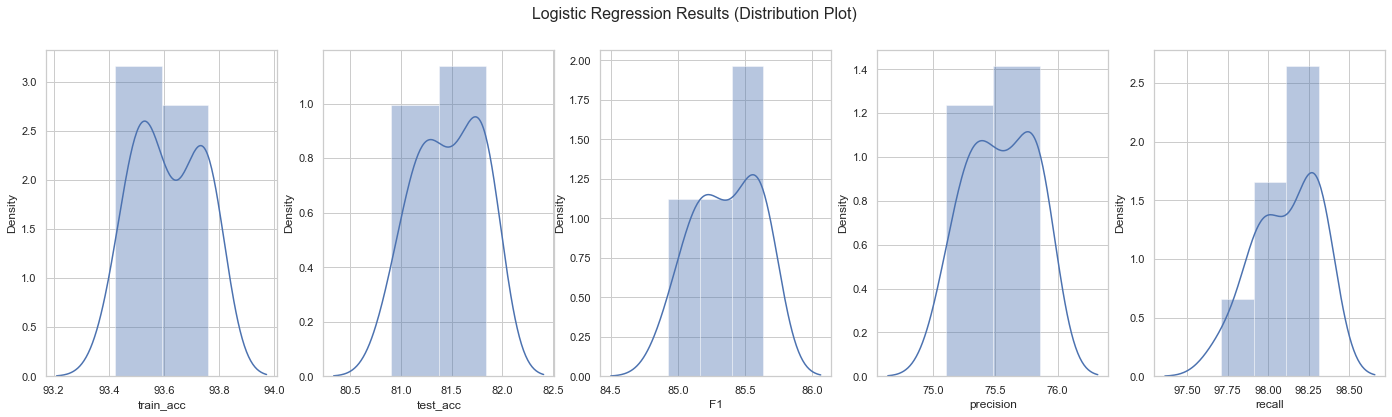

In [23]:
sns.set(rc={"figure.figsize":(24, 6), 'axes.facecolor':'white',})
sns.set_style("whitegrid")

fig, axs = plt.subplots(ncols=5, nrows=1)
ax=sns.distplot(df_dist["train_acc"], ax=axs[0])
ax=sns.distplot(df_dist['test_acc'], ax=axs[1])
ax=sns.distplot(df_dist['F1'], ax=axs[2])
ax=sns.distplot(df_dist['precision'], ax=axs[3])
ax=sns.distplot(df_dist['recall'], ax=axs[4])
fig.suptitle("Logistic Regression Results (Distribution Plot)", size=16)

ax.figure.savefig("Analysis_LR/LR_Distplot.png", dpi=400)

### Jointplot

In [24]:
df_reg = pd.read_csv("Analysis_LR/LR_results.csv")
df_reg = df_reg.drop(["max_Iter", "Penalty", "runtime(s)", "C"], axis=1)
columns = ["train_acc", "test_acc", "F1", "precision", "recall"]
for col in columns:
    df_reg[col] *= 100


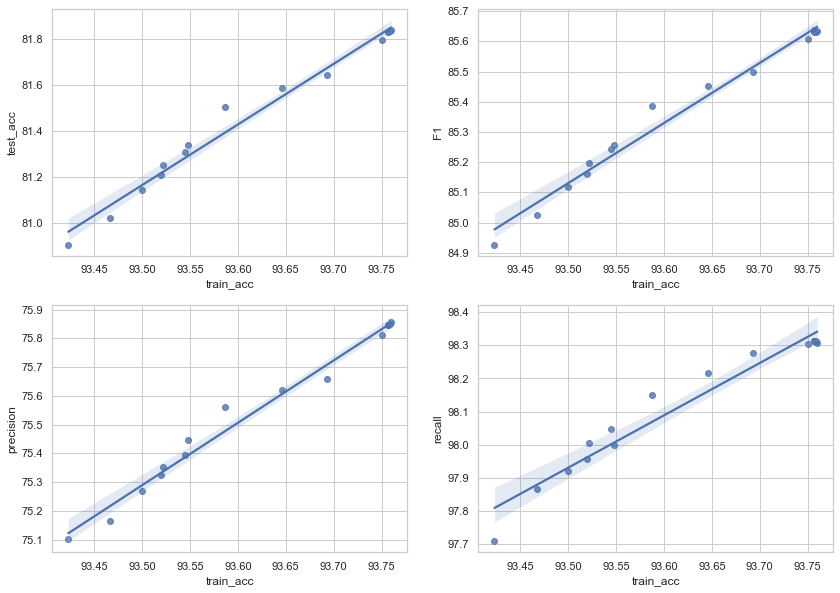

In [26]:
sns.set(rc={"figure.figsize":(14, 10), 'axes.facecolor':'white',})
sns.set_style("whitegrid")

fig, axs = plt.subplots(ncols=2, nrows=2)
ax=sns.regplot(x='train_acc', y='test_acc', data=df_reg, ax=axs[0, 0])
ax=sns.regplot(x='train_acc', y='F1', data=df_reg, ax=axs[0,1])
ax=sns.regplot(x='train_acc', y='precision', data=df_reg, ax=axs[1,0])
ax=sns.regplot(x='train_acc', y='recall', data=df_reg, ax=axs[1, 1])

#fig.suptitle("Logistic Regression Results (Regression Plot)", size=16)
ax.figure.savefig("Analysis_LR/LR_regplot.png", dpi=400)